In [1]:
import numpy as np
np.set_printoptions(precision=2,suppress=True)
import matplotlib.pyplot as plt
%matplotlib inline
from BLEanalysis.signals import Signals
from BLEanalysis.angleinference import AnglesUsePatternMeans as Angles, normalise_logs_to_ps

#We'll use this dataset as 'training' data (to provide the pattern):
sigs = Signals("noamploc2long.log",'d',angleOffset = 38)
#We'll use this dataset for testing
testsigs = Signals("/home/mike/Documents/Research/bluetooth_experiments/March 26 2025 Field Trial/Range Trials/2.log",'c',angleOffset=93)
angles = Angles(sigs,noisevar=10**2)
angles_testset = Angles(testsigs,noisevar=10**2)
sigs.summarise()

Standardising angles and times (shifting by 38.00 degrees)
Standardising angles and times (shifting by 93.00 degrees)
Transmitter       Number of records
        d                39557


# Using the Training Set as the Test set?

Here I just set the test set to the training data! (to see how it does)

In [2]:
#testsigs = Signals("noamploc2long.log",'d',angleOffset = 38+93)
#angles_testset = Angles(testsigs,noisevar=10**2)

([], [])

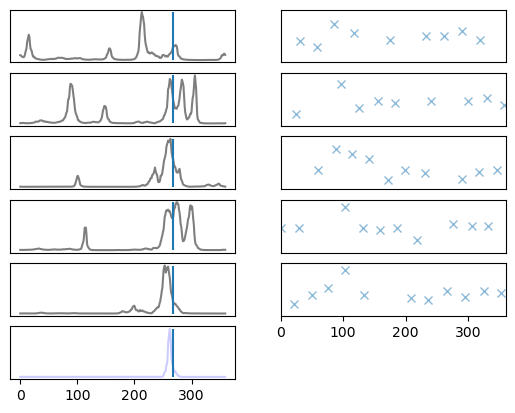

In [18]:
total_logp = np.zeros(360)
N = 5
for i in range(N):
    obs,obs_angles = testsigs.getSample(1100,150)
    logp,errs,avgAtAngles,keptObs = angles.infer(obs,obs_angles)
    total_logp+=logp
    plt.subplot(N+1,2,2*i+1)
    ps = normalise_logs_to_ps(logp)
    plt.plot(ps,'-k',alpha=0.5)
    plt.vlines(360-93,0,np.max(ps))
    
    plt.yticks([],[])
    plt.xticks([],[])
    plt.subplot(N+1,2,2*i+2)
    
    plt.plot(np.rad2deg(obs_angles),obs,'x',alpha=0.5)
    plt.xlim([0,360])
    plt.ylim([-100,-70])
    plt.yticks([],[])
    if i<N-1: plt.xticks([],[])
plt.subplot(N+1,2,2*N+1)
total_ps = normalise_logs_to_ps(total_logp)
plt.plot(total_ps,'-b',alpha=0.2)
plt.vlines(360-93,0,np.max(total_ps))
#plt.ylim([0,0.4])
plt.yticks([],[])

In [ ]:
# 1 minute
# 10 bursts [with 150ms interval]
# 









